In [44]:
import pandas as pd
df = pd.read_csv('VSRR_Provisional_Drug_Overdose_Death_Counts.csv')
df.head(10)


,Year,Percent Complete,Percent Pending Investigation
count,59400.000000,59400.000000,59400.000000
mean,2018.636364,99.999899,0.115672
std,2.384543,0.007106,0.160604
min,2015.000000,99.500000,0.000000
25%,2017.000000,100.000000,0.016961
50%,2019.000000,100.000000,0.052139
75%,2021.000000,100.000000,0.152606
max,2023.000000,100.000000,1.632556


In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df['State'] = df['State'].astype("string")
df['Period'] = df['Period'].astype("string")
df['Indicator'] = df['Indicator'].astype("string")

df['Data Value'] = pd.to_numeric(df['Data Value'], errors='coerce')

df['Data Value'] = df['Data Value'].fillna(0).astype("int64")

df['Month'] = df['Month'].astype("string")
df['Footnote'] = df['Footnote'].astype("string")
df['Footnote Symbol'] = df['Footnote Symbol'].astype("string")
df['State Name'] = df['State Name'].astype("string")
df['Predicted Value'] = df['Predicted Value'].astype("string")

df = df.dropna(subset=['Percent Complete'])
df = df.dropna(subset=['Percent Pending Investigation'])

df.describe()


,Year,Data Value,Percent Complete,Percent Pending Investigation
count,59400.000000,59400.000000,59400.000000,59400.000000
mean,2018.636364,143.240808,99.999899,0.115672
std,2.384543,214.563051,0.007106,0.160604
min,2015.000000,0.000000,99.500000,0.000000
25%,2017.000000,0.000000,100.000000,0.016961
50%,2019.000000,48.000000,100.000000,0.052139
75%,2021.000000,200.000000,100.000000,0.152606
max,2023.000000,999.000000,100.000000,1.632556


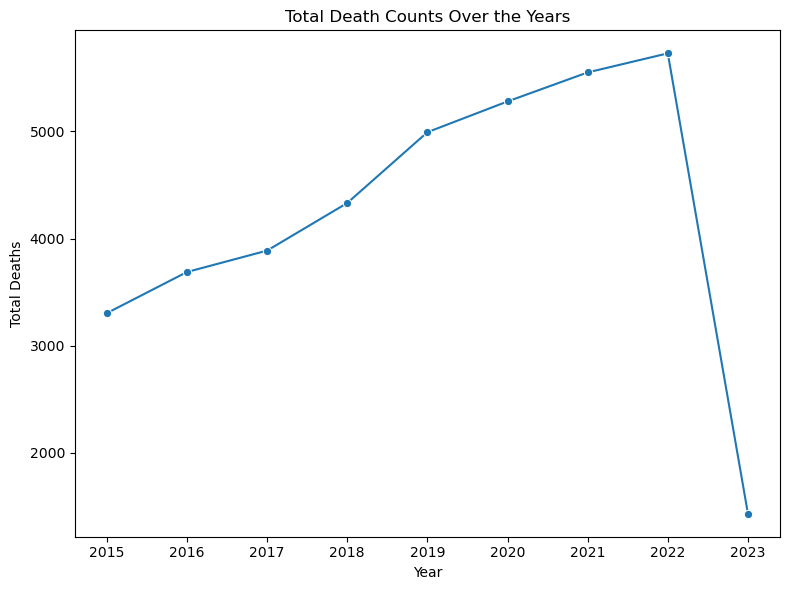

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = df.dropna(subset=['Predicted Value'])
df = df.dropna(subset=['Data Value'])

death_counts_per_year = df.groupby(['Year', 'Data Value']).size().reset_index(name='Frequency')

total_death_counts_per_year = death_counts_per_year.groupby('Year')['Frequency'].sum().reset_index(name='Total Deaths')

plt.figure(figsize=(8, 6))
sns.lineplot(x='Year', y='Total Deaths', data=total_death_counts_per_year, marker='o')
plt.title('Total Death Counts Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Deaths')

plt.tight_layout()
plt.show()